# Course 2: Applied Linear Algebra for Machine Learning

Matrices can be seen as linear transformation in a vector

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.graphic_vectors import graph_vecs

In [2]:
A = np.array([[-1,3], [2,-2]])
print(A)

[[-1  3]
 [ 2 -2]]


In [4]:
vector = np.array([[2], [1]])
print(vector)
print(vector.flatten())

[[2]
 [1]]
[2 1]


In [5]:
#Since images are stored as matrices, it is good to know the usage of flatten
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

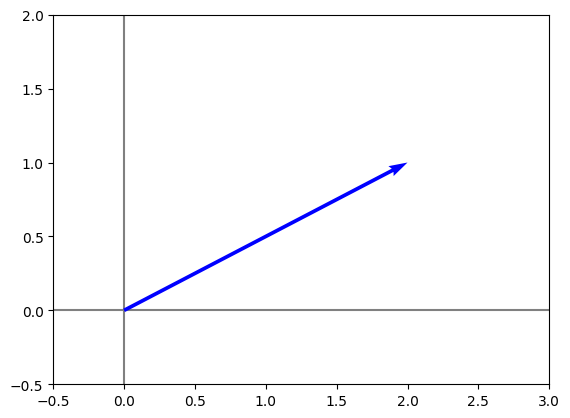

In [6]:
graph_vecs([vector.flatten()], cols = 'blue')

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)

In [8]:
vector_transformed = A.dot(vector) #Apply matrix on vector

print(vector)
print(vector_transformed)

[[2]
 [1]]
[[1]
 [2]]


(-0.5, 3.0)

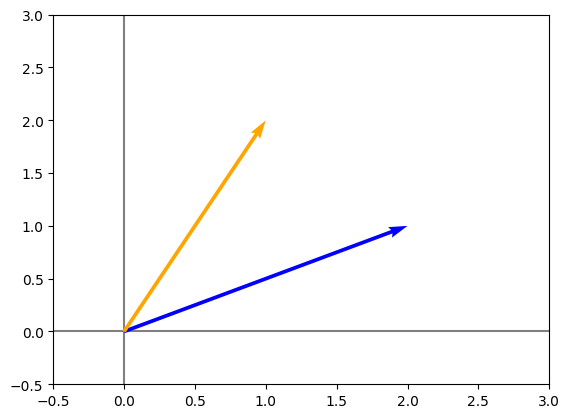

In [10]:
graph_vecs([vector.flatten(), vector_transformed.flatten()], 
           cols= ['blue', 'orange'])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

In [12]:
print(np.linalg.det(A))

-4.0


In [13]:
print(np.linalg.norm(vector))
print(np.linalg.norm(vector_transformed))

2.23606797749979
2.23606797749979


# EigenValues and EigenVectors
Eigenvector ->  a vector that doesn't change when a transformation is applied on it

In [20]:
orange_light = '#FF9A13'
blue_light = '#1190FF'

In [15]:
X = np.array([[3,2], [4,1]])
print(X)

[[3 2]
 [4 1]]


In [16]:
v = np.array([[1], [1]])
print(v)

[[1]
 [1]]


In [17]:
u = X.dot(v)
print(u)

[[5]
 [5]]


(-1.0, 6.0)

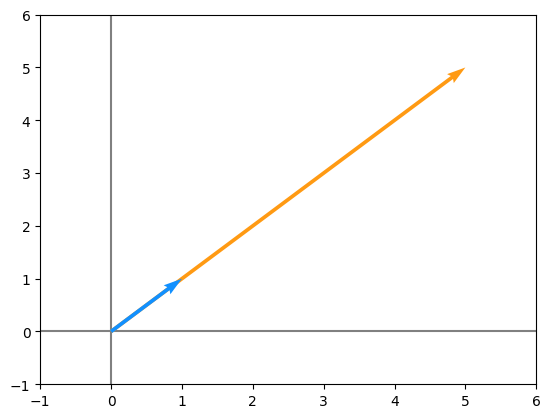

In [21]:
graph_vecs([u.flatten(), v.flatten()], cols=[orange_light, blue_light])

plt.xlim(-1, 6)
plt.ylim(-1, 6)

Eigenvector could be pointing at the same direction but it could have a different amplitude due to the eigenvalue

In [22]:
lambda_1 = 5

lambda_1 * v

array([[5],
       [5]])

In [23]:
s = np.array([[-1], [2]])
print(s)

[[-1]
 [ 2]]


In [24]:
t = X.dot(s)
print(t)

[[ 1]
 [-2]]


Here, we can see that the eigenvector is still in the same path or direction (it keeps its angle), but its maginute and orientation could change.

(-3.0, 3.0)

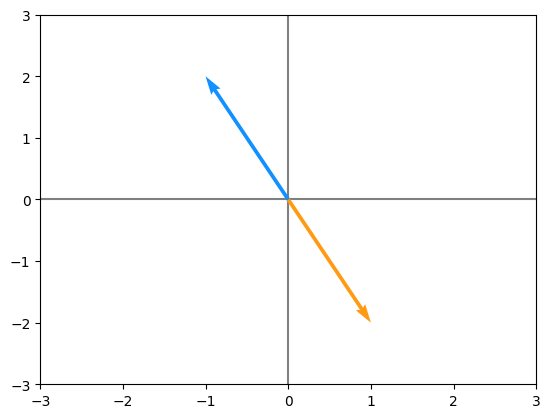

In [27]:
graph_vecs([t.flatten(), s.flatten()], cols=[orange_light, blue_light])

plt.xlim(-3, 3)
plt.ylim(-3, 3)

# how to calculate eigenvalues and eigenvectors

In [28]:
X = np.array([[3,2], [4,1]])

print(X)

[[3 2]
 [4 1]]


In [29]:
print(np.linalg.eig(X))

EigResult(eigenvalues=array([ 5., -1.]), eigenvectors=array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))


In [30]:
eigenvalues, eigenvectors = np.linalg.eig(X)
print(eigenvalues)

[ 5. -1.]


In [31]:
print(eigenvectors[:, 0])

[0.70710678 0.70710678]


In [32]:
print(eigenvectors[:, 1])

[-0.4472136   0.89442719]


In [33]:
v = np.array([[-1], [2]])
Xv = X.dot(v)
v_np = eigenvectors[:, 1]

They are the same vector in a way. They keep the angle. What changes is the eigenvalue associated to it (magnitude and dir)


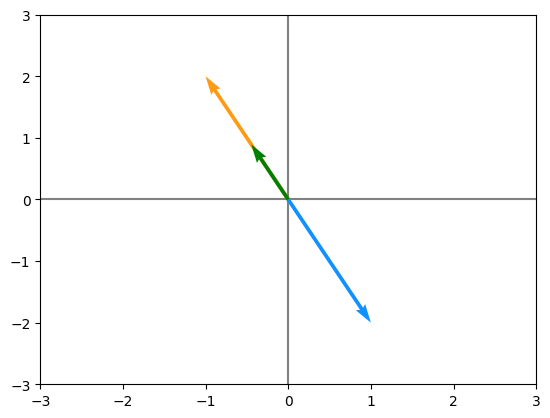

In [36]:
graph_vecs([Xv.flatten(), v.flatten(), v_np], cols=[blue_light, orange_light, 'green'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)

print("They are the same vector in a way. They keep the angle. What changes is the eigenvalue associated to it (magnitude and dir)")


## Matrix decomposition

Find two or more matrices that can help me to write the original matrix

* V = [Eigenvectors]
* lambda =  [Inverse of eigenvectors]

A = [Eigenvectors] [eigenvalues in a diagonal] [Inverse of eigenvectors]

In [38]:
A = np.array([[3, 2], [4, 1]])
print(A)

[[3 2]
 [4 1]]


In [39]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [40]:
A_calc = eigenvectors.dot(np.diag(eigenvalues)).dot(np.linalg.inv(eigenvectors))
print(A_calc)

[[3. 2.]
 [4. 1.]]


In [41]:
#Symmetric and real
A = np.array([[3, 2], [2, 3]])
print(A)

[[3 2]
 [2 3]]


In [43]:
print("Symmetric matrix:\n", A == A.T)

Symmetric matrix:
 [[ True  True]
 [ True  True]]


In [44]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


If matrix is symmetric, then:

* A = A.T

* A = V.diag(lambda).V.T

Computing a transpose is easier than computing an inverse

In [46]:
A_calc = eigenvectors.dot(np.diag(eigenvalues)).dot(eigenvectors.T)
print(A_calc)

[[3. 2.]
 [2. 3.]]


# Singular Value Decomposition

Eigenvalues and eigenvectors decomposition of a matrix can only be applied when matrix is squared. 

In order to decompose a non-square matrix, we would need to use singular value decomposition (SVD).

U = orthogonal matrix -> Singular vectors (left)

V = orthogonal matrix -> singular vectors (right)

D = diagonal matrix -> All singular values in diagonal and zeros outside.

In [47]:
A = np.array([[1,2,3], [3,4,5]])

print(A)

[[1 2 3]
 [3 4 5]]


In [49]:
U, D, V = np.linalg.svd(A)
print(U)
print(np.diag(D))
print(V)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
[[7.97638869 0.        ]
 [0.         0.61418515]]
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


We are compressing information from R to R**-1

A = U * D * V

# Three transformations

Since we have 3 matrices, each of them could be represented as a transformation as well

[[3 7]
 [5 2]]
Unit circle


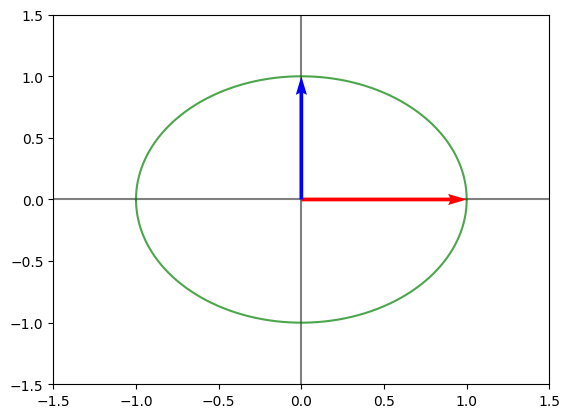

 Transformed unit circle


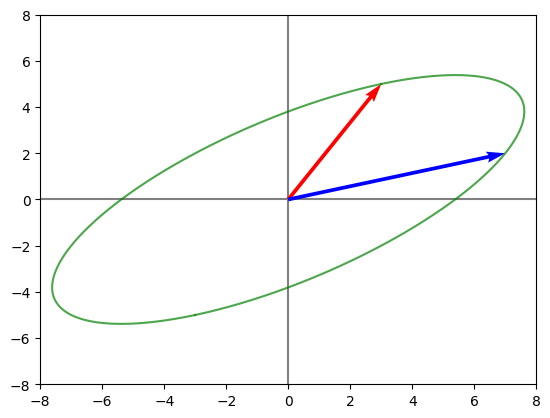

In [2]:
from utils.graph_matrix import graph_matrix


A = np.array([[3, 7], [5, 2]])
print(A)
print("Unit circle")
graph_matrix(np.array([[1,0], [0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print(" Transformed unit circle")
graph_matrix(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [4]:
U, D, V = np.linalg.svd(A)
print(U)

[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


Unit circle


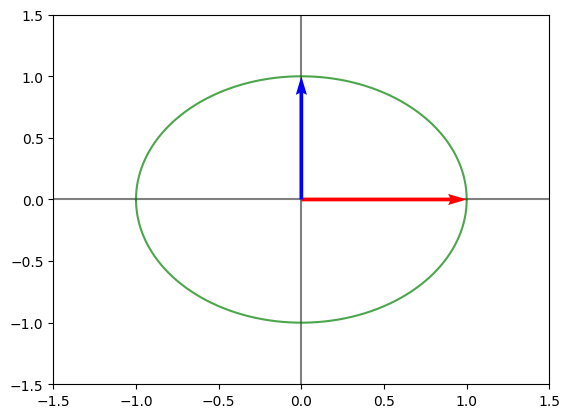

First transformation V: Rotation


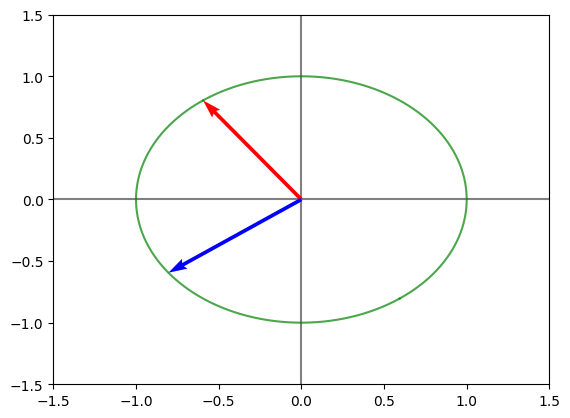

Second transformation D: Scale


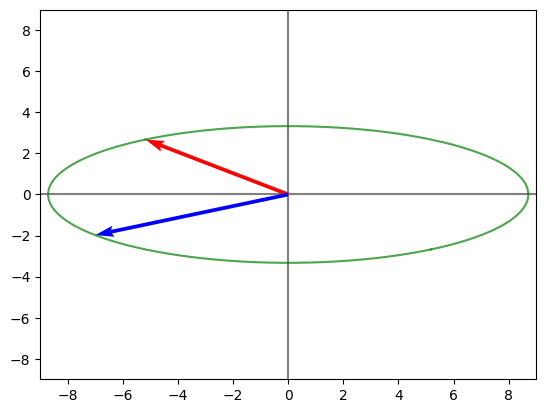

Third transformation D: Second Rotation


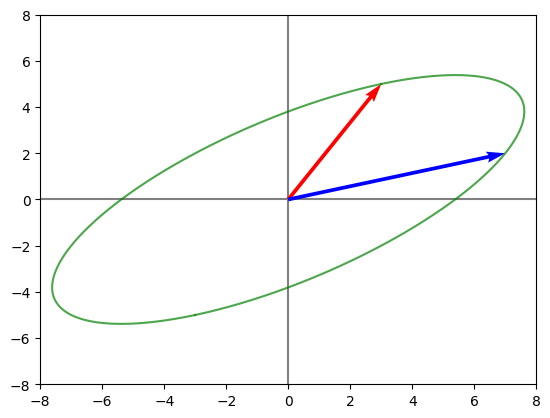

In [7]:
print("Unit circle")
graph_matrix(np.array([[1,0], [0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("First transformation V: Rotation")
graph_matrix(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("Second transformation D: Scale")
graph_matrix(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print("Third transformation D: Second Rotation")
graph_matrix(U.dot(np.diag(D).dot(V)))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Check if the transformation is equal to A 


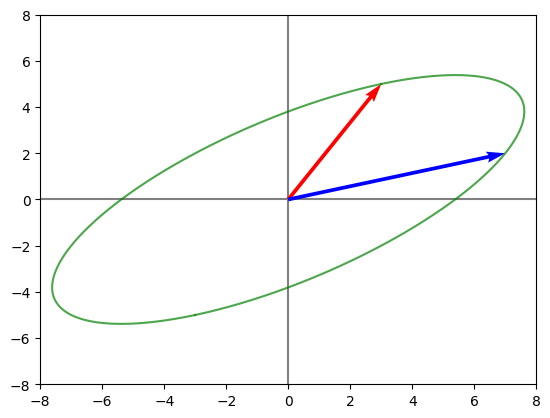

In [8]:
print("Check if the transformation is equal to A ")
graph_matrix(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# How to interpret singular values

In [4]:
A = np.array([[3, 7], [5, 2]])
print(A)

[[3 7]
 [5 2]]


In [5]:
U, D, V = np.linalg.svd(A)

print(D[0])
print(D[1])

8.7133796929634
3.3282148858288965


In [6]:
u1 = [D[0] * U[0,0], D[0] * U[0,1]]
v1 =[D[1] * U[1,0], D[1] * U[1,1]]

print([A[0,0], A[1,0]])
print(u1)
print()

print(A[0,1], A[1,1])
print(v1)

[np.int64(3), np.int64(5)]
[np.float64(-7.4120434792975685), np.float64(-4.580894796297923)]

7 2
[np.float64(-1.7497461132982814), np.float64(2.8311486829996433)]


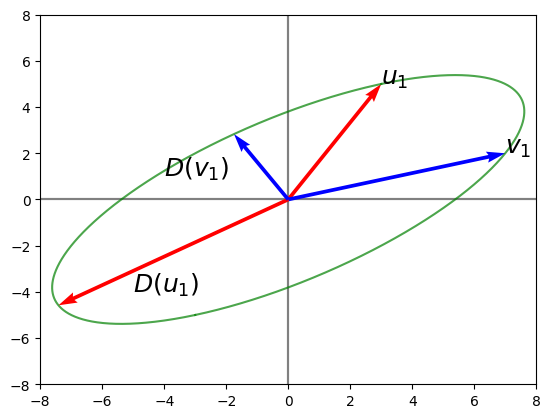

In [8]:
graph_matrix(A)
graph_vecs([u1, v1], cols = ['red', 'blue'])

plt.text(3, 5, r"$u_1$", size=18)
plt.text(7, 2, r"$v_1$", size=18)

plt.text(-5, -4, r"$D(u_1)$", size=18)
plt.text(-4, 1, r"$D(v_1)$", size=18)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.show()